In [1]:
import pandas as pd

df_train = pd.read_csv("../../Desktop/DSI-SF-Cojasami-Kaggle/Datasets/west_nile/input/train.csv")
df_spray = pd.read_csv("../../Desktop/DSI-SF-Cojasami-Kaggle/Datasets/west_nile/input/spray.csv")
df_weather= pd.read_csv("../../Desktop/DSI-SF-Cojasami-Kaggle/Datasets/west_nile/input/weather.csv")

In [2]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


Top three species of mosquitos in the Chicago area are:

CULEX PIPIENS/RESTUANS    4752

They breed in temporary ground water, the edges of grassy swampland, sphagnum bogs, road side ditches, tire ruts, hoof prints, discarded buckets, tires, catch basins, sewage effluent and septic seepage

CULEX RESTUANS            2740

CULEX PIPIENS             2699

Their breeding grounds include storm sewer catch basins, clean and polluted ground pools, ditches, animal waste lagoons, effluent from sewage treatment plants and other sites that are slightly to very eutrophic or polluted with organic wastes.

* CULEX PIPIENS/RESTUANS are two different species yet there is a field that appears to represent a count of both. 
            * we are uncertain if this is a duplicate count of species OR if it indicates an area where both species  
            of mosquitos are present

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dist_species = dict(df_train.Species.value_counts())

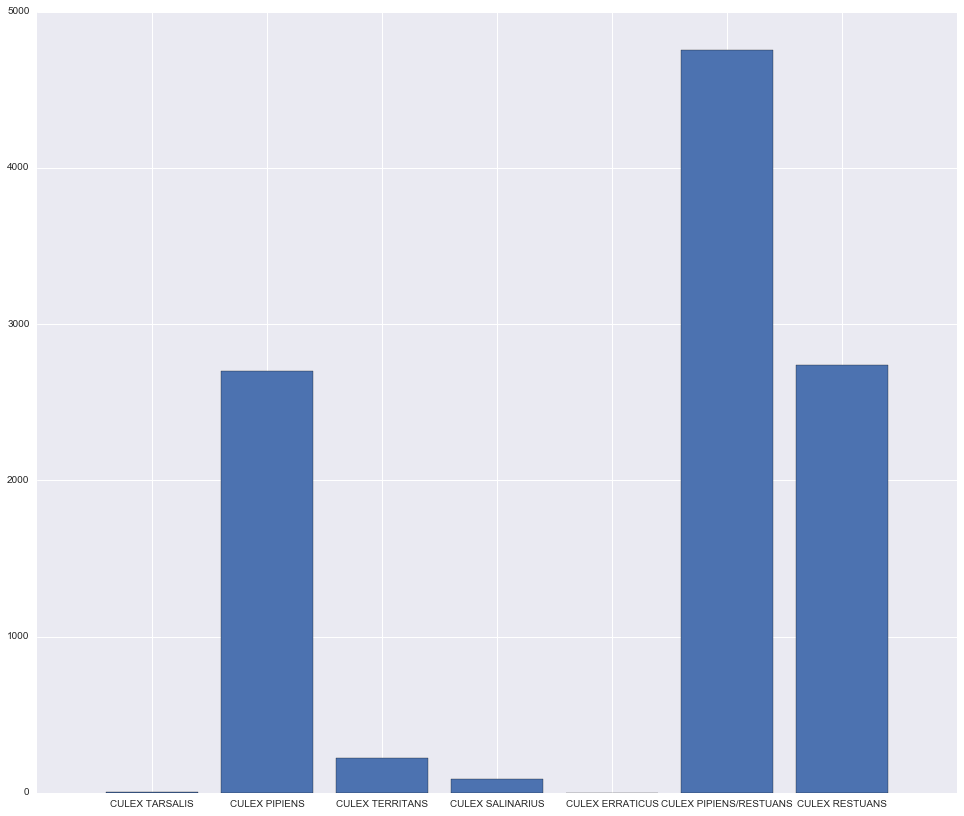

In [34]:
#distribution of species 
fig = plt.figure(figsize=(16.5, 14),dpi=300)
plt.bar(range(len(dist_species)), dist_species.values(), align='center')
plt.xticks(range(len(dist_species)), dist_species.keys())

plt.show()

In [63]:
mosq_blocks = df_train.groupby(["Block","Species"])["NumMosquitos"].sum()

In [65]:
mosq_blocks.head()

Block  Species               
10     CULEX ERRATICUS               7
       CULEX PIPIENS             10386
       CULEX PIPIENS/RESTUANS    14925
       CULEX RESTUANS             6459
       CULEX SALINARIUS             43
Name: NumMosquitos, dtype: int64

In [8]:
df_train.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

Species that carries westnile?

1 = yes

0 = no

Documnetation confirming carriers of west nile disease (CDC)
http://www.cdc.gov/westnile/resources/pdfs/mosquitospecies1999-2012.pdf


CULEX PIPIENS/RESTUANS = 1; these are two specifies combined
CULEX RESTUANS = 1
CULEX PIPIENS = 1
CULEX SALINARIUS = 1
CULEX TERRITANS = 1
CULEX TARSALIS = 1 

Culex Pipiens - They can be found in Central and Eastern United States with the exception of Florida, and in urban areas elsewhere in the U.S.A. House mosquitoes are common in urban and suburban communities as well as on rural premises. Their breeding grounds include storm sewer catch basins, clean and polluted ground pools, ditches, animal waste lagoons, effluent from sewage treatment plants and other sites that are slightly to very eutrophic or polluted with organic wastes.

Culex Quinquefasciatus- They are generally active only during the warmer months; they usually attack humans towards the middle of the night indoors and outdoors, but are often more attracted to birds. They typically lay a single batch of 140-340 eggs after each blood meal. These mosquitoes can be found in the same areas as the Culex Pipiens.

Culex Restuans - They have a distribution that ranges from Central Canada south into Mexico. This type of mosquito is very common in the eastern and Central United States. Pregnant females enter hibernation in fall and hibernate in basements, spring houses, outbuildings and subterranean enclosures during the winter months. They thrive on moisture and a humid atmosphere. In April they begin to lay their eggs and can be found mainly in southern New Jersey. By May they move further north and have reached their peak population by July. They breed in temporary ground water, the edges of grassy swampland, sphagnum bogs, road side ditches, tire ruts, hoof prints, discarded buckets, tires, catch basins, sewage effluent and septic seepage.

Aedes Albopictus - The "Asian Tiger" mosquito was first discovered in Houston Texas in 1987. It has spread to 678 counties in 25 states. Such mosquitoes carry over twenty two arboviruses, including many viruses of public health importance. This mosquito is widely distributed in the South-Eastern United States. Its eggs can survive very cold winters resulting in their potential to carry diseases into a substantial portion of the United States. Infestations are less common northward and westward, presumably because of less hospitable environments.

Aedes Vexans - are one of the most widespread mosquito species in the world. Their distribution includes Nearctic and Palearctic regions, the African west coast as well as Oriental regions. In North America, they are common in Southern Canada and throughout the United States with the exception of Hawaii. They lay their eggs in small depressions which are subject to flooding. The females are persistent biters and most active in the early evening. The adults are known to fly great distances and are readily attra

In [3]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
df_weather.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [7]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
